In [1]:
!pip install sccoda pertpy

  Using cached scCODA-0.1.9-py3-none-any.whl.metadata (4.2 kB)
  Using cached pertpy-0.9.4-py3-none-any.whl.metadata (6.9 kB)
  Using cached tensorflow_probability-0.24.0-py2.py3-none-any.whl.metadata (13 kB)
  Using cached arviz-0.20.0-py3-none-any.whl.metadata (8.8 kB)
  Using cached decoupler-1.8.0-py3-none-any.whl.metadata (4.6 kB)
  Using cached lamin_utils-0.13.6-py2.py3-none-any.whl.metadata (980 bytes)
  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached PubChemPy-1.0.4-py3-none-any.whl
  Using cached scikit_misc-0.5.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.0 kB)
  Using cached scvi_tools-1.2.0-py3-none-any.whl.metadata (16 kB)
  Using cached xarray-2024.9.0-py3-none-any.whl.metadata (11 kB)
  Using cached h5netcdf-1.4.0-py3-none-any.whl.metadata (13 kB)
  Using cached xarray_einstats-0.8.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached dm_tree-0.1.8-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.meta

In [ ]:
!pip install toytree arviz ete3

  Using cached toytree-3.0.5-py3-none-any.whl.metadata (3.6 kB)
  Using cached ete3-3.1.3-py3-none-any.whl
  Using cached loguru-0.7.2-py3-none-any.whl.metadata (23 kB)
  Using cached toyplot-2.0.0-py3-none-any.whl.metadata (1.9 kB)
  Using cached custom_inherit-2.4.1-py3-none-any.whl.metadata (838 bytes)
  Using cached pypng-0.20220715.0-py3-none-any.whl.metadata (13 kB)
  Using cached reportlab-4.2.5-py3-none-any.whl.metadata (1.5 kB)
Using cached toytree-3.0.5-py3-none-any.whl (382 kB)
Using cached toyplot-2.0.0-py3-none-any.whl (279 kB)
Using cached loguru-0.7.2-py3-none-any.whl (62 kB)
Using cached custom_inherit-2.4.1-py3-none-any.whl (15 kB)
Using cached pypng-0.20220715.0-py3-none-any.whl (58 kB)
Using cached reportlab-4.2.5-py3-none-any.whl (1.9 MB)


In [1]:
import warnings

import pandas as pd

warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

import scanpy as sc
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import pertpy as pt

import itertools
import sys 

import gseapy as gp
from scipy.stats      import median_abs_deviation
import math

2024-10-07 23:30:37.913774: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
import anndata2ri
import logging

import rpy2.rinterface_lib.callbacks as rcb
import rpy2.robjects as ro

# Only Errors from R will be Displayed
rcb.logger.setLevel(logging.ERROR)

# Allows for Dataframe Conversion from R and Pandas seamlessly
ro.pandas2ri.activate()

# Allows for Anndata conversion to R seamlesleslly
anndata2ri.activate()

# Magic command to load the R jupyter notebooks extension with python
# %load_ext rpy2.ipython
%reload_ext rpy2.ipython

In [6]:
%%R
library(SingleCellExperiment)
library(Seurat)
library(scater)
library(scDblFinder)
library(BiocParallel)
library(SoupX)
library(S4Vectors)
library(zellkonverter)
library(Matrix)
library(reticulate)
library(scry)



    an issue that caused a segfault when used with rpy2:
    https://github.com/rstudio/reticulate/pull/1188
    Make sure that you use a version of that package that includes
    the fix.
    

Loading required package: SummarizedExperiment
Loading required package: MatrixGenerics
Loading required package: matrixStats

Attaching package: ‘MatrixGenerics’

The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
    rowOrderStats, rowProds, rowQuantiles, rowRanges, ro

In [7]:
study_design = pd.read_excel('smillie_study_design.xlsx')
study_design

,Subject ID,Disease,Location,Gender,Smoking
0,N19,Colitis,Transverse_Colon,Female,Never
1,N26,Colitis,Sigmoid_Colon,Male,Former
2,N23,Colitis,Colon,Female,Never
3,N14,Colitis,Right_Colon,Female,Never
4,N12,Colitis,Proximal_Sigmoid,Male,Former
5,N9,Colitis,Right_Colon,Male,Former
6,N7,Colitis,Transverse_Colon,Female,Never
7,N106,Colitis,Rectum,Female,Never
8,N44,Colitis,Sigmoid_Colon,Female,Former
9,N49,Colitis,Rectum,Male,Never


In [7]:
# adata = sc.read_h5ad('smillie_2019_processed_06Oct2024.h5ad')

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'smillie_2019_processed_05Oct2024.h5ad', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

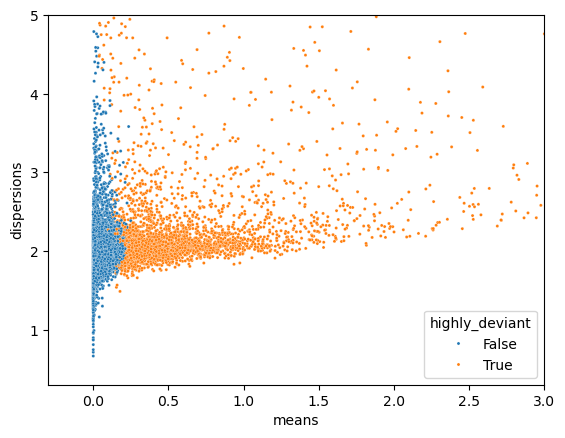

In [6]:
ax = sns.scatterplot(
    data=adata.var, x="means", y="dispersions", hue="highly_deviant", s=5
)
ax.set_xlim(None, 3)
ax.set_ylim(None, 5)
plt.show()

**Unmute and Call if Deviance or Highly_variable attribute needs to be changed**

In [11]:
# adata.var['highly_variable'] = adata.var['highly_deviant']
# sc.pp.pca(adata, svd_solver="arpack", use_highly_variable=True)
# sc.pl.pca_scatter(adata, color="total_counts")
# sc.pp.neighbors(adata)
# sc.tl.umap(adata)

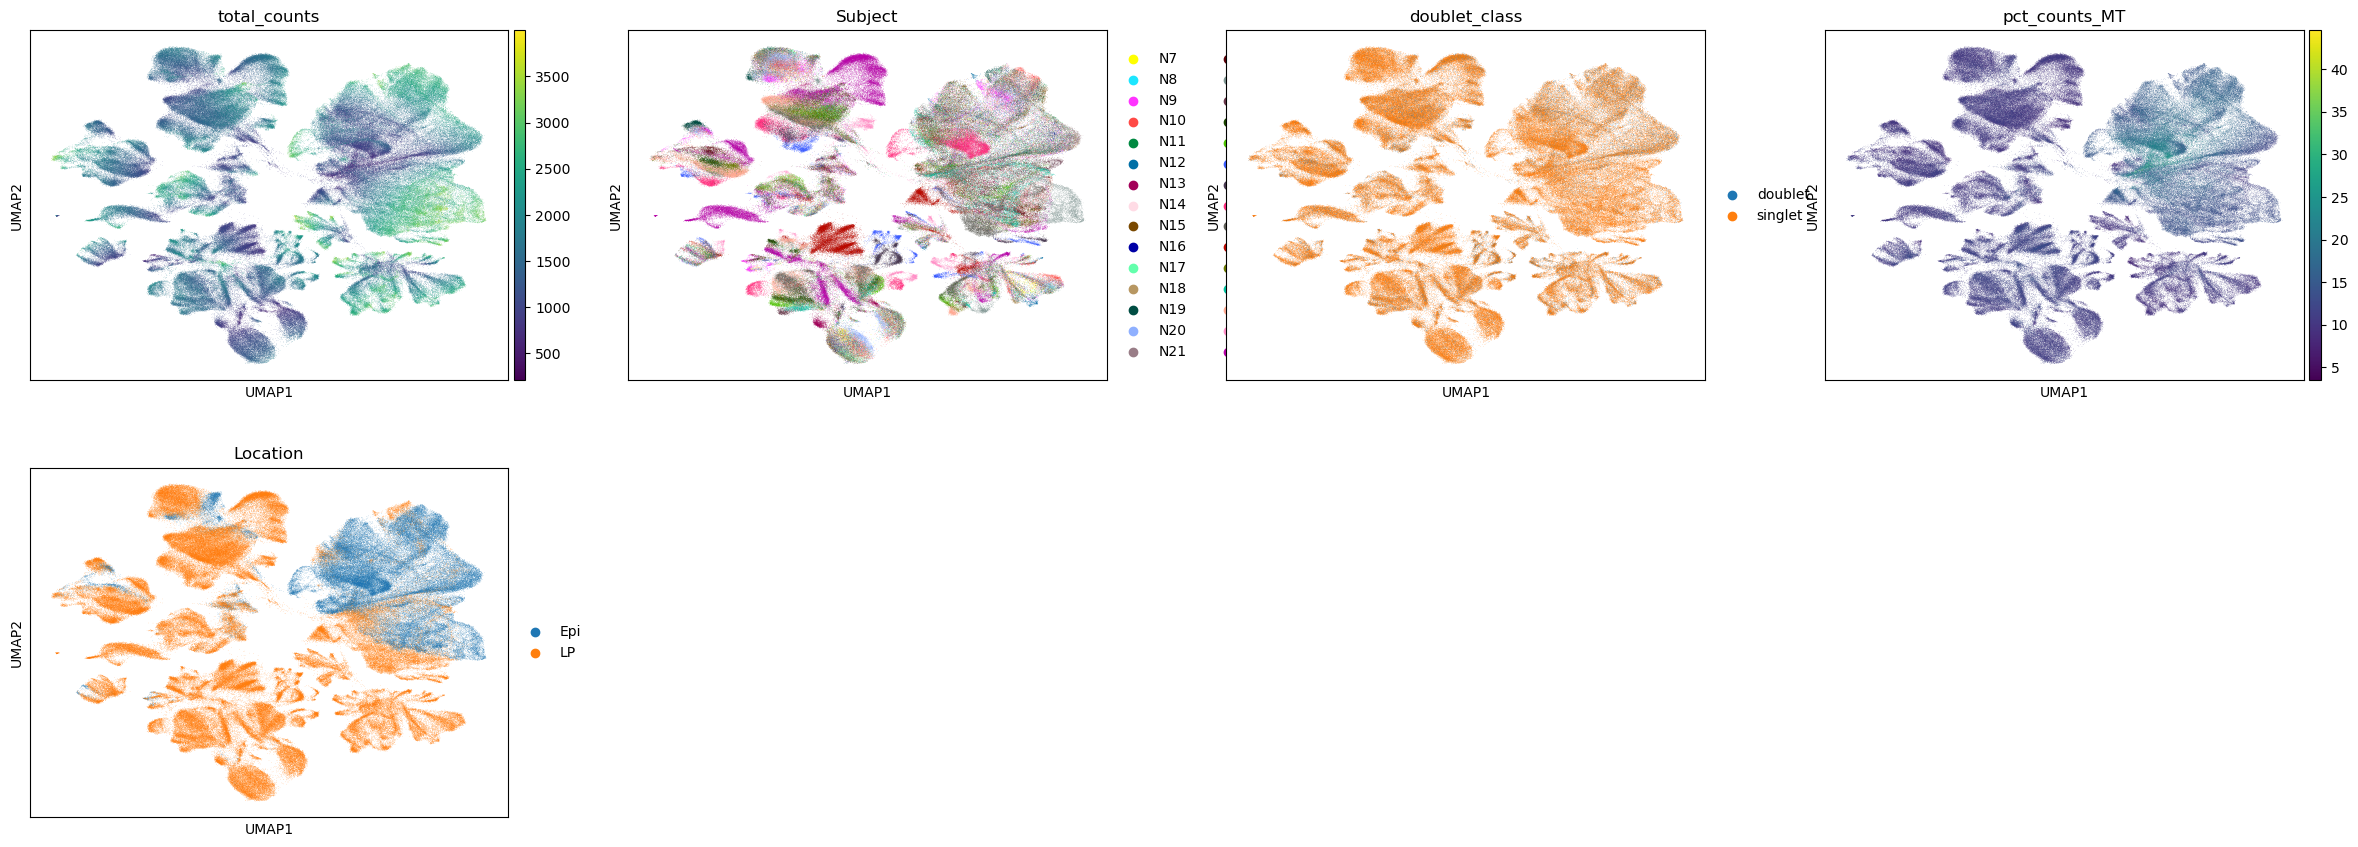

In [7]:
umap_cols = ['total_counts', 'Subject', 'doublet_class', 'pct_counts_MT', 'Location']
# sc.pl.umap(adata, color=umap_cols)

sc.pl.umap(adata, color = umap_cols)

**Interpretation of Subject UMAP**
1. Lots of overlap of Subjects... batch effects don't seem to be present
2. N9 and N13 Have clear separation in the UMAP 
3. N9	Colitis	Right_Colon	Male	Former (diseased)
4. N13	HC	Right_Colon	Female	Former (HC)
5. It seems that the right colon colitis sample may have signficant biological heterogeneity

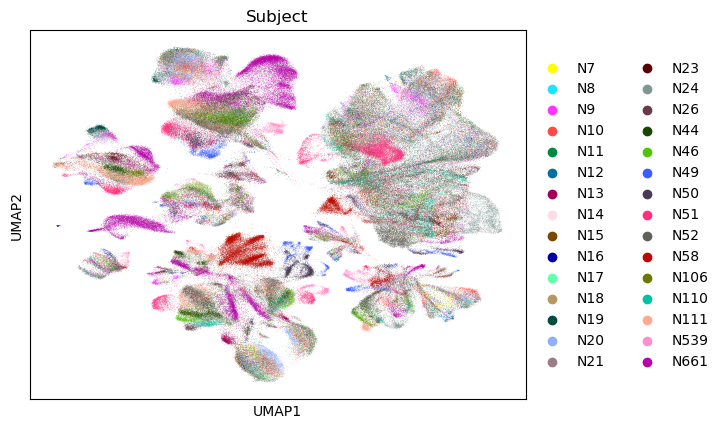

In [23]:
umap_cols               = ['Subject']

sc.pl.umap(adata, color = umap_cols)

**Most Samples Only Have 2 Replicates**
1.  'N52 D': 8,
2. 'N111 D': 4,
3. 'N58 D': 4,
4. 'N661 D': 4,
5. 4 of the diseased subjects have extra replicates (Probably to further investigate, or the prevalance of the disease)

In [21]:
def replicate_metadata(print_results = True):
    '''
    Summarizes the number of replciates per Subject ID 
    '''
    diseased_subjects = study_design[study_design['Disease'] == 'Colitis']['Subject ID'].unique()
    healthy_subjects  = study_design[study_design['Disease'] == 'HC']['Subject ID'].unique()

    replicate_summary = {}
    subject = adata.obs['Subject']
    for disease_id in diseased_subjects:
        replicates = adata.obs[subject == disease_id]['Replicate'].value_counts().apply(lambda x: x > 0)
        replicate_summary[disease_id + ' D'] = len(replicates[replicates == True])
        # replicate_summary[disease_id + ' D'] = replicates[replicates == True]

    for healthy_id in healthy_subjects:
        replicates = adata.obs[subject == healthy_id]['Replicate'].value_counts().apply(lambda x: x > 0)
        replicate_summary[healthy_id + ' H'] = len(replicates[replicates == True])
        # replicate_summary[healthy_id + ' H'] = replicates[replicates == True]

    return replicate_summary

# replicate_summary = replicate_metadata()

**Only Rerun if Leiden Clustering Needed Again**
1. Algorithm takes ~10 minutes to run

In [25]:
# sc.tl.leiden(adata)

# Cell Annotation Workflow
--- 
Potential Databases for Cell Markers
1. CellMarker (http://xteam.xbio.top/CellMarker/) --- Does not contain digestive tract cells
2. PanglaoDB (https://panglaodb.se/) --  Contains GI Tract Cells
3. Human Protein Atlas (https://www.proteinatlas.org/) -- Contains Glial and Endocrine Cells
4. Tabula Sapiens (https://tabula-sapiens.sf.czbiohub.org/)
5. Single Cell Expression Atlas (https://www.ebi.ac.uk/gxa/sc/home)
6. Gastrointestinal Cell Atlas
7. CellTypist (https://www.celltypist.org/)
8. Cell Ontology
9. scARCHES

**Use the PanglaoDB Annotations for Following Cells**
---
PanglaoDB Uses a Community Based Ranking System TO show Which Genes have Consensus as being Markers of Cell Types
1. Goblet Cells (Top Markers: MUC2 (28 upvotes), MUC5AC (7 upvotes))
2. Enterocytes (Top Markers: SLC10A2 (14 upvotes), ALPI (6 votes))
3. Enteroendocrine Cells (Top Markers: CHGA (7 upvotes), GFRA3 (1 upvote))
4. Paneth Cells (Top Markers: MMP7 (5 upvotes), DEFA5 (5 upvotes), LYZ1 (5 upvotes))
5. Crypt Cells (Top Markers: OLFM4 (3 upvotes), LGR5 (2 upvotes))
6. Enteric Glia Cells (Top Markres: SOX10 (3 upvotes))
7. Foveolar Cells (Top Markers: IL33 (0 upvotes also 6 other cell type markers so might not be accurate))
8. Gastric Chief Cells (Top Markers: CHIA (4 upvotes))
9. Microfold Cells (Top Markers: GP2 (2 upvotes))
10. Parietal Cells (Top Markers: HIP1R (0 upvotes, but only 1 cell type is marked as using this marker))
11. Tuft Cells (Top Markers: AVIL (16 upvotes), POU2F3 (2 upvotes))


In [8]:
adata = sc.read_h5ad('smillie_2019_processed_06Oct2024.h5ad')

**Plot Genes that are expressing Our Marker Genes Using UMAP Representations and see if Cell Clusters are reveiled**

In [11]:
marker_genes = {'Goblet': ['MUC2', 'MUC5AC'],
              'Enterocytes': ['SLC10A2', 'ALPI'],
              'Enteroendrocrine': ['CHGA', 'GFRA3'],
              'Paneth': ['MMP7', 'DEFA5', 'LYZ1'],
              'Crypt': ['OLFM4', 'LGR5'],
              'Enteric Glia': ['SOX10'],
              'Foveolar': ['IL33'],
              'Gastric Chief': ['CHIA'],
              'Microfold': ['GP2'],
              'Parietal': ['HIP1R'],
              'Tuft': ['AVIL', 'POU2F3']
              }


In [12]:
def pull_present_markers():
    '''
    Return the active markers in a dataset  
    '''
    
    marker_genes_in_data = dict()
    for ct, markers in marker_genes.items():
        markers_found = list()
        for marker in markers:
            if marker in adata.var.index:
                markers_found.append(marker)
        marker_genes_in_data[ct] = markers_found

    return marker_genes_in_data

GOBLET:


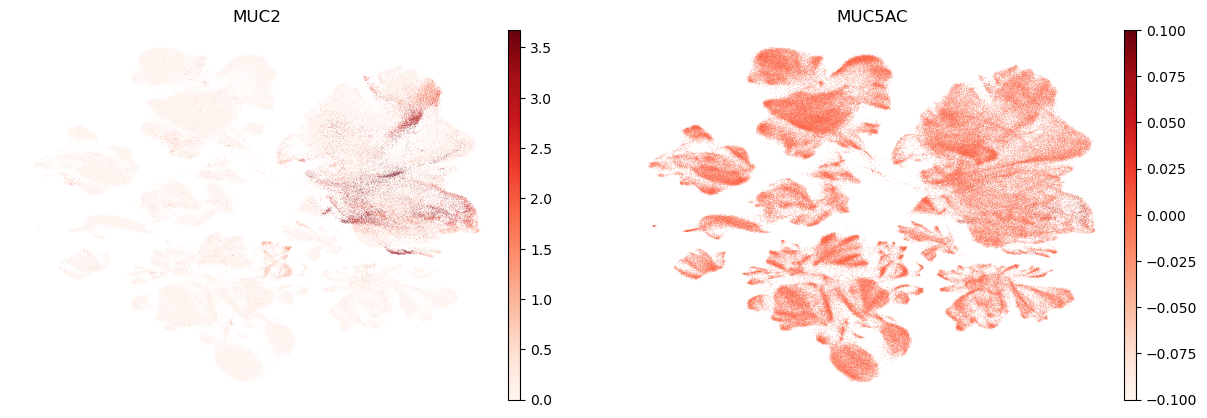





ENTEROENDROCRINE:


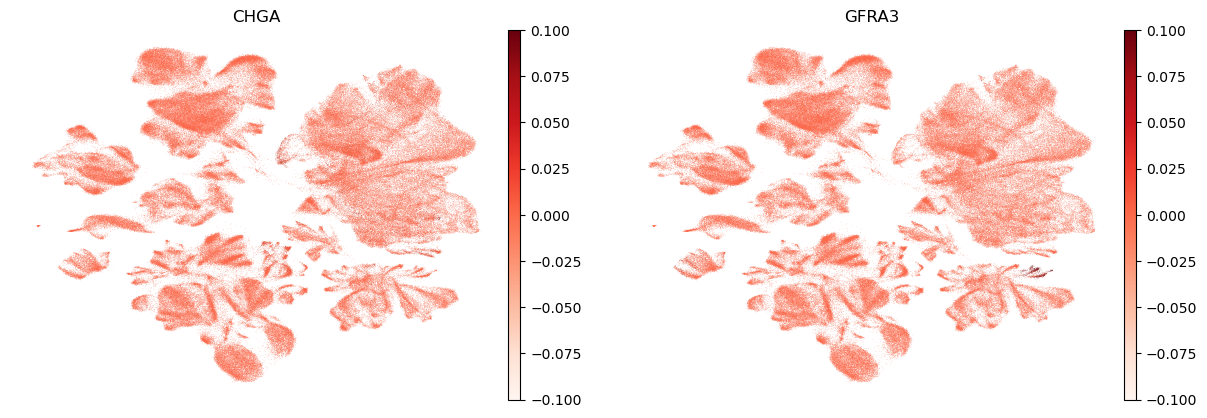





PANETH:


In [13]:
for ct in marker_genes_in_data:

    # Only plot if markers were found in data
    if len(marker_genes_in_data[ct]) > 0:
        print(f"{ct.upper()}:")  # print cell subtype name
        sc.pl.umap(
            adata,
            color=marker_genes_in_data[ct],
            vmin=0,
            vmax="p99",  # set vmax to the 99th percentile of the gene count instead of the maximum, to prevent outliers from making expression in other cells invisible. Note that this can cause problems for extremely lowly expressed genes.
            sort_order=False,  # do not plot highest expression on top, to not get a biased view of the mean expression among cells
            frameon=False,
            cmap="Reds",  # or choose another color map e.g. from here: https://matplotlib.org/stable/tutorials/colors/colormaps.html
        )
        print("\n\n\n")  # print white space for legibility

# Use Human Protein Atlas Annotations to Discover Cell Types
---

In [ ]:
marker_genes = {'Enteroendocrine': 
                ['GIP', 'INSL5', 'PYY', 
                'NEUROG3', 'SST', 'SLC18A1',
                'CHGA', 'NTS', 'TPH1', 'UCN3', 
                'CRYBA2', 'FEV', 'GPR142', 'INSM1',
                'LCN15', 'RXFP4', 'SYT13']}